In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1- Clustering

In [78]:
# Loading Data 
df_BTC = pd.read_csv('/content/drive/MyDrive/NAICo/Cleaned Data/BTC_Data.csv')
df_Oil = pd.read_csv('/content/drive/MyDrive/NAICo/Cleaned Data/Oil_Data.csv')
df_Gold = pd.read_csv('/content/drive/MyDrive/NAICo/Cleaned Data/Gold_Data.csv')

df_BTC.head()

,Date,Close,Open,RoR
0,2017-05-17,1801.3,1729.3,0.041635
1,2017-05-18,1881.0,1801.3,0.044246
2,2017-05-19,1962.0,1881.0,0.043062
3,2017-05-20,2040.2,1962.0,0.039857
4,2017-05-21,2044.2,2040.2,0.001961


In [79]:
# Change Date dtype to datetime 
df_BTC['Date'] = pd.to_datetime(df_BTC['Date'])
df_Oil['Date'] = pd.to_datetime(df_Oil['Date'])
df_Gold['Date'] = pd.to_datetime(df_Gold['Date'])

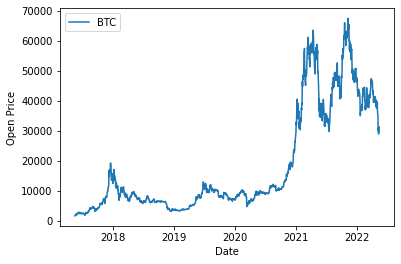

In [80]:
plt.plot(df_BTC['Date'], df_BTC['Open'], label='BTC')
# plt.title('BTC')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.show()

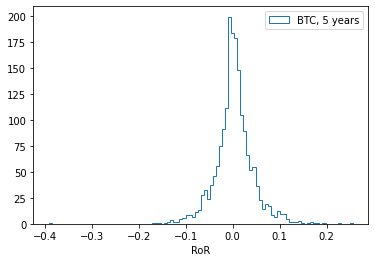

In [81]:
plt.hist(np.array(df_BTC['RoR']) , bins=100, label='BTC, 5 years', histtype='step')
# plt.title('BTC')
plt.xlabel('RoR')
plt.legend()
# plt.ylabel('')
plt.show()

In [82]:
# Assigning cluster labels -1, 0, 1 
def assign_label(fid_eff_val):
    if fid_eff_val <= -0.05:
        return -1
    elif fid_eff_val <= 0.05:
        return 0
    else:
        return 1
    
df_BTC['label'] = df_BTC['RoR'].apply(lambda x: assign_label(x)).astype(int)

In [83]:
print(df_BTC.shape)
print(df_BTC['label'].value_counts())
df_BTC.head(5)

(1826, 5)
 0    1503
 1     169
-1     154
Name: label, dtype: int64


,Date,Close,Open,RoR,label
0,2017-05-17,1801.3,1729.3,0.041635,0
1,2017-05-18,1881.0,1801.3,0.044246,0
2,2017-05-19,1962.0,1881.0,0.043062,0
3,2017-05-20,2040.2,1962.0,0.039857,0
4,2017-05-21,2044.2,2040.2,0.001961,0


#2- Data Analysis

In [ ]:
# Merge RoR values for similar dates
inner_merged_RoR = pd.merge(df_BTC[['Date', 'RoR', 'label']], df_Oil[['Date', 'RoR']], on=['Date'])
inner_merged_RoR = pd.merge(inner_merged_RoR, df_Gold[['Date', 'RoR']], on=['Date'])

# Rename Column names
inner_merged_RoR = inner_merged_RoR.rename(columns={'RoR_x': 'RoR_BTC', 'RoR_y': 'RoR_Oil', 'RoR': 'RoR_Gold'}) 

inner_merged_RoR.head()

,Date,RoR_BTC,label,RoR_Oil,RoR_Gold
0,2017-05-17,0.041635,0,0.017417,0.017378
1,2017-05-18,0.044246,0,0.008584,-0.006818
2,2017-05-19,0.043062,0,0.021307,0.005454
3,2017-05-22,0.039233,0,0.002569,0.003101
4,2017-05-23,0.069761,1,0.008425,-0.003888


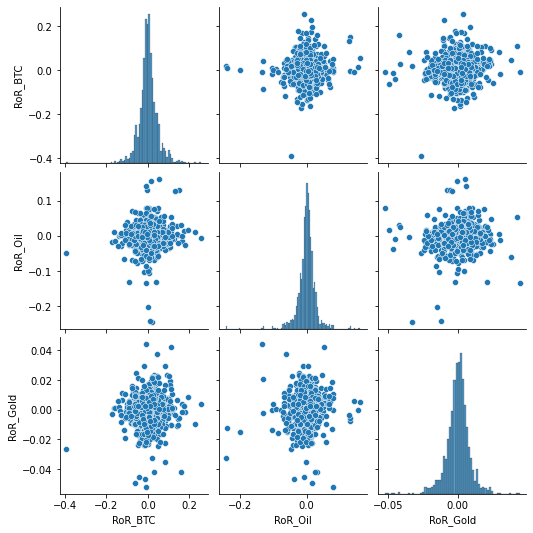

In [ ]:
sns.pairplot(inner_merged_RoR.drop(['Date', 'label'], axis=1))
plt.show()

In [ ]:
print('BTC vs Oil CorrCoef:', np.corrcoef(inner_merged_RoR['RoR_Oil'], inner_merged_RoR['RoR_BTC'])[0,1] )
print('BTC vs Gold CorrCoef:', np.corrcoef(inner_merged_RoR['RoR_Gold'], inner_merged_RoR['RoR_BTC'])[0,1] )

BTC vs Oil CorrCoef: 0.07193365605461535
BTC vs Gold CorrCoef: 0.06671539670702442


In [ ]:
cor_BTC_Oil = []
shift_range = np.arange(-20, 21, 1)
for shift in shift_range:
  if shift < 0:
    x = inner_merged_RoR['RoR_BTC'][:shift]
    y = inner_merged_RoR['RoR_Oil'][-1*shift:]
    cor = np.corrcoef(x, y)[0,1]
    cor_BTC_Oil.append(cor)
  elif shift == 0:
    x = inner_merged_RoR['RoR_BTC']
    y = inner_merged_RoR['RoR_Oil']
    cor = np.corrcoef(x, y)[0,1]
    cor_BTC_Oil.append(cor)
  else:
    x = inner_merged_RoR['RoR_BTC'][shift:]
    y = inner_merged_RoR['RoR_Oil'][:-1*shift]
    cor = np.corrcoef(x, y)[0,1]
    cor_BTC_Oil.append(cor)

print(np.abs(cor_BTC_Oil))

[0.01687996 0.0068115  0.01037859 0.01318901 0.01363031 0.04370426
 0.04006456 0.04287418 0.03526973 0.02093353 0.03983749 0.0423091
 0.04065622 0.02863575 0.06838016 0.03630355 0.0914964  0.03127314
 0.04225174 0.03136904 0.07193366 0.03335495 0.0242115  0.02186531
 0.00650254 0.00296151 0.02005544 0.01816104 0.06726076 0.00405807
 0.01125827 0.01199136 0.03116688 0.02169559 0.00987098 0.00325869
 0.04079119 0.00020584 0.03507461 0.0119428  0.01728412]


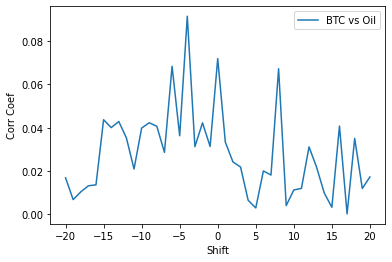

In [ ]:
plt.plot(shift_range, np.abs(cor_BTC_Oil), label='BTC vs Oil')
# plt.title('BTC')
plt.xlabel('Shift')
plt.ylabel('Corr Coef')
plt.legend()
plt.show()

In [ ]:
cor_BTC_Gold = []
shift_range = np.arange(-20, 21, 1)
for shift in shift_range:
  if shift < 0:
    x = inner_merged_RoR['RoR_BTC'][:shift]
    y = inner_merged_RoR['RoR_Gold'][-1*shift:]
    cor = np.corrcoef(x, y)[0,1]
    cor_BTC_Gold.append(cor)
  elif shift == 0:
    x = inner_merged_RoR['RoR_BTC']
    y = inner_merged_RoR['RoR_Gold']
    cor = np.corrcoef(x, y)[0,1]
    cor_BTC_Gold.append(cor)
  else:
    x = inner_merged_RoR['RoR_BTC'][shift:]
    y = inner_merged_RoR['RoR_Gold'][:-1*shift]
    cor = np.corrcoef(x, y)[0,1]
    cor_BTC_Gold.append(cor)

print(np.abs(cor_BTC_Gold))

[0.02844719 0.03125598 0.00180373 0.0155865  0.05435037 0.01279082
 0.02500733 0.00342079 0.02906825 0.016616   0.0316701  0.00262599
 0.02913508 0.09545092 0.02077897 0.00541024 0.05421526 0.01211167
 0.06012624 0.01346404 0.0667154  0.01556187 0.03912194 0.03133844
 0.05537841 0.04106445 0.04955534 0.00460503 0.00475197 0.02661944
 0.01743965 0.01243976 0.02078458 0.07035035 0.02527373 0.06189085
 0.03738754 0.03098096 0.01752181 0.01227768 0.02592113]


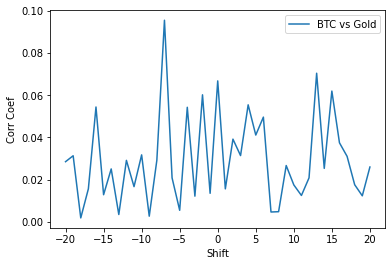

In [ ]:
plt.plot(shift_range, np.abs(cor_BTC_Gold), label='BTC vs Gold')
# plt.title('BTC')
plt.xlabel('Shift')
plt.ylabel('Corr Coef')
plt.legend()
plt.show()

#3- ML

In [84]:
data_clus = df_BTC['RoR']
n_ts = 4
n_f = 1

In [85]:
def prepare_time_seqs(data):
    output_df = pd.DataFrame()
    for i in range(n_ts):
        output_df[n_ts-i] = data.shift(n_ts-i)
    output_df['target'] = data     
    return output_df

In [113]:
df = prepare_time_seqs(data_clus)
df['target_clus'] = df['target'].apply(lambda x: assign_label(x)).astype(int)
df.head(10)

,4,3,2,1,target,target_clus
0,NaN,NaN,NaN,NaN,0.041635,0
1,NaN,NaN,NaN,0.041635,0.044246,0
2,NaN,NaN,0.041635,0.044246,0.043062,0
3,NaN,0.041635,0.044246,0.043062,0.039857,0
4,0.041635,0.044246,0.043062,0.039857,0.001961,0
5,0.044246,0.043062,0.039857,0.001961,0.039233,0
6,0.043062,0.039857,0.001961,0.039233,0.069761,1
7,0.039857,0.001961,0.039233,0.069761,0.075992,1
8,0.001961,0.039233,0.069761,0.075992,-0.056476,-1
9,0.039233,0.069761,0.075992,-0.056476,-0.026918,0


In [114]:
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,4,3,2,1,target,target_clus
0,0.041635,0.044246,0.043062,0.039857,0.001961,0
1,0.044246,0.043062,0.039857,0.001961,0.039233,0
2,0.043062,0.039857,0.001961,0.039233,0.069761,1
3,0.039857,0.001961,0.039233,0.069761,0.075992,1
4,0.001961,0.039233,0.069761,0.075992,-0.056476,-1


Classification

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [133]:
#train test split

train_split, test_split = train_test_split(df, random_state = 42, test_size = 0.2)

In [134]:
#resampling

train_neg = train_split[train_split['target_clus'] == -1]
train_zero = train_split[train_split['target_clus'] == 0]
train_pos = train_split[train_split['target_clus'] == 1]
print(len(train_neg), len(train_zero), len(train_pos))

train_neg_resampled = resample(train_neg, replace=True, n_samples=len(train_split) // 3, random_state=42)
train_zero_resampled = resample(train_zero, replace=True, n_samples=len(train_split) // 3, random_state=42)
train_pos_resampled = resample(train_pos, replace=True, n_samples=len(train_split) // 3, random_state=42)
print(len(train_neg_resampled), len(train_zero_resampled), len(train_pos_resampled))

train_resampled = pd.concat([train_neg_resampled, train_zero_resampled, train_pos_resampled])

y_train = train_resampled['target_clus'].to_numpy()
X_train = train_resampled.drop(columns = ['target_clus', 'target']).to_numpy()
y_test = test_split['target_clus'].to_numpy()
X_test = test_split.drop(columns = ['target_clus', 'target']).to_numpy()

120 1197 140
485 485 485


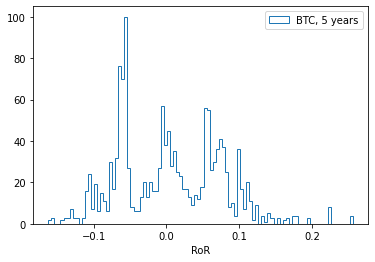

In [118]:
plt.hist(train_resampled['target'] , bins=100, label='BTC, 5 years', histtype='step')
plt.xlabel('RoR')
plt.legend()
plt.show()

In [189]:
#SVM Classfier

In [191]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [192]:
svm = make_pipeline(StandardScaler(), SVC(C = 0.01, kernel = 'rbf'))
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [193]:
from sklearn.metrics import classification_report

matrix = classification_report(y_test,y_pred)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

          -1       0.17      0.32      0.22        34
           0       0.86      0.61      0.71       302
           1       0.08      0.24      0.12        29

    accuracy                           0.55       365
   macro avg       0.37      0.39      0.35       365
weighted avg       0.73      0.55      0.62       365



Regression

In [308]:
df = prepare_time_seqs(data_clus)
df.head(10)

,4,3,2,1,target
0,NaN,NaN,NaN,NaN,0.041635
1,NaN,NaN,NaN,0.041635,0.044246
2,NaN,NaN,0.041635,0.044246,0.043062
3,NaN,0.041635,0.044246,0.043062,0.039857
4,0.041635,0.044246,0.043062,0.039857,0.001961
5,0.044246,0.043062,0.039857,0.001961,0.039233
6,0.043062,0.039857,0.001961,0.039233,0.069761
7,0.039857,0.001961,0.039233,0.069761,0.075992
8,0.001961,0.039233,0.069761,0.075992,-0.056476
9,0.039233,0.069761,0.075992,-0.056476,-0.026918


In [309]:
df.dropna(axis=0, inplace=True)
df *=10
df.reset_index(drop=True, inplace=True)
df.head()

,4,3,2,1,target
0,0.416353,0.442458,0.430622,0.398573,0.019606
1,0.442458,0.430622,0.398573,0.019606,0.392330
2,0.430622,0.398573,0.019606,0.392330,0.697609
3,0.398573,0.019606,0.392330,0.697609,0.759923
4,0.019606,0.392330,0.697609,0.759923,-0.564757


In [310]:
Y = df.target.values
X = df.drop(['target'] , axis=1).values
print(X.shape)
X = X.reshape(-1, n_ts, 1)
X.shape

(1822, 4)


(1822, 4, 1)

In [311]:
'''
Before generating the train and validation sets, let's 
hold a portion of the data for prediction. 
We seperate the data for the last n_prediction 
days and later test to see how well our model 
can predict the target for these days. 
'''
n_prediction = 50

X_future = X[-n_prediction:]
Y_future = Y[-n_prediction:]

X = X[:-n_prediction]
Y = Y[:-n_prediction]

In [312]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)
print(X_train.shape)

(1329, 4, 1)


In [313]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow import keras

In [378]:
model = models.Sequential()

model.add(layers.Flatten(input_shape =(n_ts, n_f) ))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

model.compile(optimizer='adam', 
              loss=tf.keras.losses.mean_squared_error)

model.summary()


Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 4)                 0         
                                                                 
 dense_75 (Dense)            (None, 8)                 40        
                                                                 
 dense_76 (Dense)            (None, 1)                 9         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [379]:
his_loss = []
his_val =[]

# assign weight to each data point
sample_weight = Y_train.copy()
sample_weight[Y_train < -0.5] = 90
sample_weight[Y_train > 0.5] = 10
sample_weight[(Y_train > -0.5) & (Y_train < 0.5)] = 1
print(np.unique(sample_weight))

[ 1. 10. 90.]


In [380]:
history = model.fit(X_train,Y_train, 
                    epochs=300, batch_size = 64, 
                    verbose=1 , 
                    sample_weight= sample_weight ,
                    validation_data = (X_test, Y_test))

his_loss = np.append(his_loss, history.history['loss'])
his_val = np.append(his_val, history.history['val_loss'])

Epoch 1/300
21/21 [==============================] - 1s 9ms/step - loss: 8.1797 - val_loss: 0.2156
Epoch 2/300
21/21 [==============================] - 0s 4ms/step - loss: 7.4845 - val_loss: 0.2289
Epoch 3/300
21/21 [==============================] - 0s 4ms/step - loss: 6.8749 - val_loss: 0.2452
Epoch 4/300
21/21 [==============================] - 0s 3ms/step - loss: 6.4318 - val_loss: 0.2635
Epoch 5/300
21/21 [==============================] - 0s 3ms/step - loss: 6.0280 - val_loss: 0.2806
Epoch 6/300
21/21 [==============================] - 0s 3ms/step - loss: 5.7662 - val_loss: 0.3030
Epoch 7/300
21/21 [==============================] - 0s 3ms/step - loss: 5.4832 - val_loss: 0.3194
Epoch 8/300
21/21 [==============================] - 0s 4ms/step - loss: 5.2894 - val_loss: 0.3394
Epoch 9/300
21/21 [==============================] - 0s 3ms/step - loss: 5.0831 - val_loss: 0.3491
Epoch 10/300
21/21 [==============================] - 0s 4ms/step - loss: 4.9409 - val_loss: 0.3643
Epoch 11/

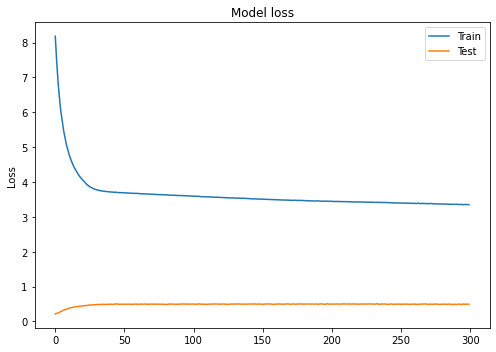

In [388]:
fig = plt.figure(figsize=(7,5))
# Plot training & validation loss values
ax = fig.add_subplot(1,1,1, title = 'Model loss', ylabel= 'Loss')
plt.plot(his_loss)
plt.plot(his_val)
plt.legend(['Train', 'Test'])

plt.tight_layout()
plt.show()

In [383]:
y_test = Y_test
y_pred = model.predict(X_test)

In [384]:
y_test[y_test < -0.5] = -1
y_test[y_test > 0.5] = 1
y_test[(y_test > -0.5) & (y_test < 0.5)] = 0

y_pred[y_pred < -0.5] = -1
y_pred[y_pred > 0.5] = 1
y_pred[(y_pred > -0.5) & (y_pred < 0.5)] = 0

In [385]:
from sklearn.metrics import classification_report

matrix = classification_report(y_test,y_pred,labels=[1,0, -1])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.02      0.05        42
           0       0.82      0.44      0.58       366
          -1       0.08      0.57      0.14        35

    accuracy                           0.41       443
   macro avg       0.63      0.35      0.25       443
weighted avg       0.78      0.41      0.49       443



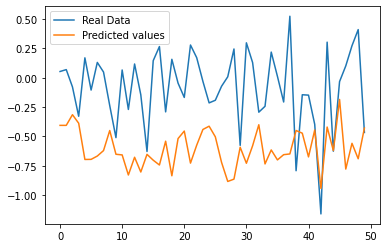

In [386]:
Y_fut_predicted = model.predict(X_future)
plt.plot(Y_future, label = 'Real Data')
plt.plot(Y_fut_predicted, label = 'Predicted values')
plt.legend(loc=0)
plt.show()